# Rappresentazione grafica di una matrice
Con la libreria matplotlib è relativamente facile rappresentare immagine in due dimensioni, definite da matrici, usando il comando [`imshow`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow).

Nel caso più semplice, la funzione prende in input una matrice di numeri, e se non viene specificato una valore per parametro `cmap`, decide in automatico i colori da assegnare a ciascun valore diverso della matrice. Per vedere esempi di possibili ColorMap si rimanda a questo [tutorial](http://matplotlib.org/users/colormaps.html).

## La scacchiera
L'esempio più semplice di immagine che corrisponde ad una matrice è sicuramente una scacchiera, in cui possiamo assegnare un numero al bianco ed un altro al nero.

Per esempio, il codice seguente crea un'immagine corrispondente ad una scacchiare 8x8, in cui ad ogni coppia di interi $(i,j)$ viene assegnato il valore 0, che vienne "mappato" al nero, oppure il valore 1, che viene "mappato" al bianco. La mappatura al bianco e al nero viene determinata dal parametro `cmap=gray`.

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


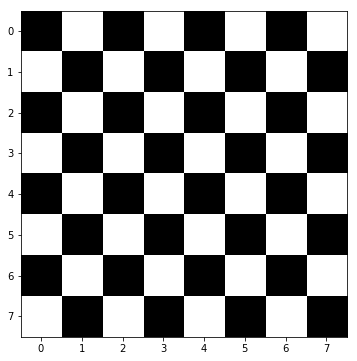

In [1]:
import matplotlib.pyplot as plt
+

def DrawChessBoard(n=8):
    # L'operatore '%' calcola il resto della divisione
    ChessBoard = np.matrix([[(i+(j%2))%2 for i in range(n)] for j in range(n)])
    print(ChessBoard)
    # Crea una figura, disegna l'immagine data dalla matrice, aggiungi la colorbar sulla destra
    fig = plt.figure(figsize=(6,6))
    # Uso la colormap 'gray' per avere la schacchiera in bianco&nero
    img = plt.imshow(ChessBoard, cmap='gray')
    plt.show()
    
DrawChessBoard(8)

## Un gradiente circolare
Per rendersi idea di come vengono gestiti i colori, si consideri il codice seguente, in cui per comodità si usa il piano complesso, e si fa corrispondere ad ogni elemento $a_{rc}$ di una matrice quadrata $n \times n$ il valore:

$$a_{rc} = \mid complex(r-n, c-n) \mid$$

in cui `complex(a,b)` è la primitiva di Python che crea il numero complesso $a+b\,i$ (i unità immaginaria).

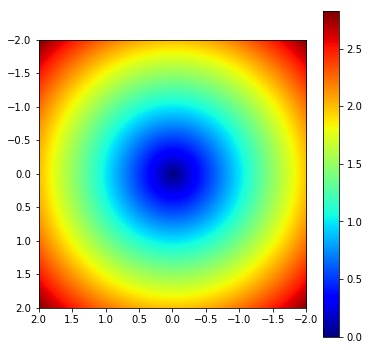

In [2]:
# Calcola il modulo del numero complesso
# che viene usato per stabilire il colore nell'immagine
def ComplexModulo(z):
    return abs(z)

# Costruisci una matrice n x n dove ciascun elemento
# corrisponde ad un pixel dell'immagine; il valore numerico
# dell'elemento ne determina il colore
def MakeImage(F, n, scale=0.01):
    data = [scale*i for i in range(-n,n)]
    return np.matrix([[F(complex(a, b)) for a in data] for b in data])

# Disegna l'immagine della matrice creata dalla funzione F(z) : Z -> R
def DrawImage(F, n, scale):
    # Restituisce una matrice n*n
    m = MakeImage(F, n, scale)
    # Crea una figura, disegna l'immagine data dalla matrice, aggiungi la colorbar sulla destra
    plt.figure(figsize=(6,6))
    img = plt.imshow(m, extent=(scale*n, -scale*n, scale*n, -scale*n), cmap='jet')
    plt.colorbar()
    plt.show()

# Alcuni parametri
DrawImage(ComplexModulo, 200, 0.01)

**ESERCIZIO:** Provare ad usare diversi valori per la colormap, come indicato nel relativo [tutorial](http://matplotlib.org/users/colormaps.html).

## Un frattale semplice: il Julia Set
Usando le matrici, si può facilmente arrivare a rappresentare immagini frattali in 2D.

Prendiamo per esempio un semplice [insieme di Julia](https://en.wikipedia.org/wiki/Julia_set). Per darne una rappresentazione grafica, usiamo il piano complesso tramite una matrice come nell'esempio precedente, e per ogni punto del piano complesso $(r,c)$, corrispondente all'elemento $a_{(n-r)(n-c)}$ della matrice quadrata $n \times n$, controlliamo se la successione dei punti:

$$z_{k+1} = z_k^2 + c$$

converge in un numero finito di iterazioni, oppure diverge. La successione si considera divergere quando $\mid z_{k+1} \mid > 2$, mentre si considera a convergenza se dopo un numero massimo di iterazioni la condizione precedente non si è ancora verificata.

**ESERCIZIO 1:** Si completi la funzione `JuliaSetRec(z, c, k)` seguente in modo che controlli se la successione $z_{k+1} = z_k^2 + c$ sia convergente o meno; il parametro `z` corrisponde al numero complesso, `c` è la costante che appare nella successione, ` k` è il numero di ricorsione corrente. Se la successione converge la funzione ritorna il valore 0; se la successione diverge la funzione ritorna il numero di ricorsione `k` in cui si è dichiarata la successione come divergente. **Si implementi la funzione in maniera RICORSIVA.**

In [ ]:
# Per informazioni di base sui Julia Set, vedere per esempio:
# https://en.wikipedia.org/wiki/Julia_set
def JuliaSetRec(z, c, k, max_k=64):
    # DA COMPLETARE
    
    # FAR TORNARE IL VALORE COME SPECIFICATO SOPRA
    return 0

def JuliaSet(z, c=-0.413):
    return JuliaSetRec(z, c, 0)

# Alcuni parametri
DrawImage(JuliaSet, 200, 0.01)

**ESERCIZIO FACOLTATIVO 2:** Si implementi una funzione che disegni un frattale corrispondente all'[insieme di Mandelbrot](https://en.wikipedia.org/wiki/Mandelbrot_set#Computer_drawings).

**ESERCIZIO FACOLTATIVO 3:** Si implementi una funzione che disegni un frattale di [Newton](https://en.wikipedia.org/wiki/Newton_fractal).